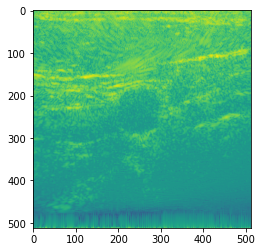

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/gpfs/fs2/scratch/mdoyley_lab/GPU_VA/DL_dataset/test/bmode/VNS085_CCATR_96.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import os
from os import walk
# return a tuple of arrays ([all directories inside input path], [all files inside input path])
def get_content_of_path(pathname, get_dir=True, get_filenames=True):
    f = []
    for (dirpath, dirnames, filenames) in walk(pathname):
        f.extend(filenames)
        break
    result = []
    if get_dir is False:
        return filenames
    if get_filenames is False:
        return dirnames
    return dirnames, filenames


def get_image_lists_from_dataset(datasets_path):
    train_bmode_list = []
    train_mask_list = []
    test_bmode_list = []
    test_mask_list = []

    if datasets_path != None:
        dataset_list = os.listdir(datasets_path)
        for dataset in dataset_list:
            bmode_list = [] # input
            mask_list = [] # output
            dataset_folder = datasets_path + dataset + "/"
            dataset_dirnames = get_content_of_path(dataset_folder, get_filenames=False)

            # loop through image files and put them in list corresponding to their filename
            for filename in dataset_dirnames:
                if filename != "bmode" and filename != "mask":
                    continue
                image_folder = dataset_folder + filename + "/"
                image_paths = get_content_of_path(image_folder, get_dir=False)
                image_paths = [image_folder + image_path for image_path in image_paths]
                if filename == "bmode":
                    bmode_list = image_paths
                elif filename == "mask":
                    mask_list = image_paths

            # assign bmode and mask list depending on dataset type
            if dataset == "train":
                train_bmode_list = bmode_list
                train_mask_list = mask_list
            elif dataset == "test":
                test_bmode_list = bmode_list
                test_mask_list = mask_list
    return train_bmode_list, train_mask_list, test_bmode_list, test_mask_list

In [ ]:
train_bmode, train_mask, test_bmode, test_mask = get_image_lists_from_dataset(datasets_path)

In [ ]:
import random
import matplotlib.image as mpimg
plt.figure(figsize=(20,20))
img_folder=r'/gpfs/fs2/scratch/mdoyley_lab/GPU_VA/DL_dataset/train/bmode'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)